# 회귀 
- 교재 308P
- 입력값(=독립변수, feature, 피처),  
입력변수들 사이에 관계성이 있다면 다중공선성문제라고 한다.

- 결과값(=종속변수)
독립변수의 변화에 영향을 받아서 종속변수라고 한다.

상관관계분석 할 때 1, -1쪽으로 가까운 쪽의 결과가 나오면
1 : 하나가 오를 때 다른 값도 오름
-1 : 하나가 내려갈 때 다른 값도 내려감

독립변수가 값이 작아지면 종속변수도 영향을 받아서 값이 같이 작아지거나 커지거나

y = wx + b  
y,x의 값은 우리가 안다.  
y = w0 * x0 + w1 * x1 + w2 * x2 + b  

x = 독립변수 w = 가중치(회귀 계수) y = 아파트 가격  
회귀 예측의 핵심은 최적의 회귀 계수를 찾아내는 것  

선형 회귀는ㄴ 실제 값과 예측 값의 차이(오류의 제곱 값)을 최소화하는 직선형 회귀선을 최적화하는 방식이다.  

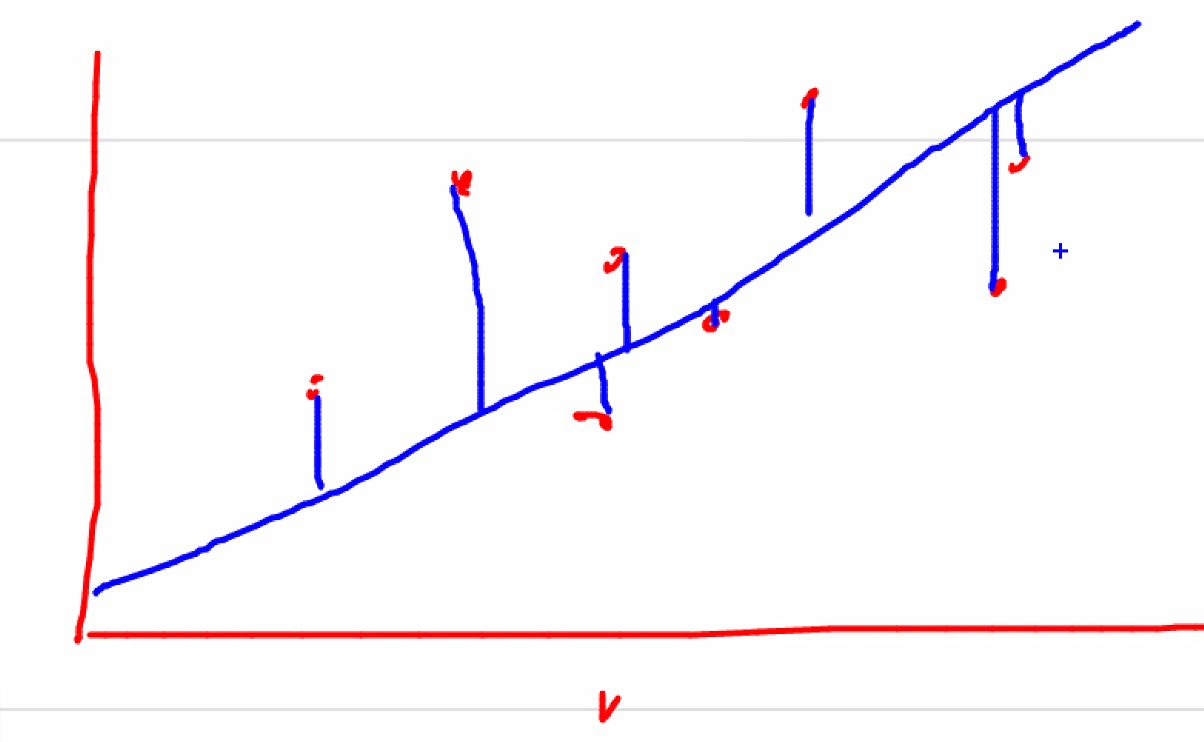

파랑색 선을 찾는 것  
오차는 데이터 갯수만큼 나오니까 대표값 하나로 얘기한다.  
대표값 하나가 차이값들을 전부다 더해서 평균값을 내는 것이다.

-없애주기 위해서 절대값, 제곱을 하거나
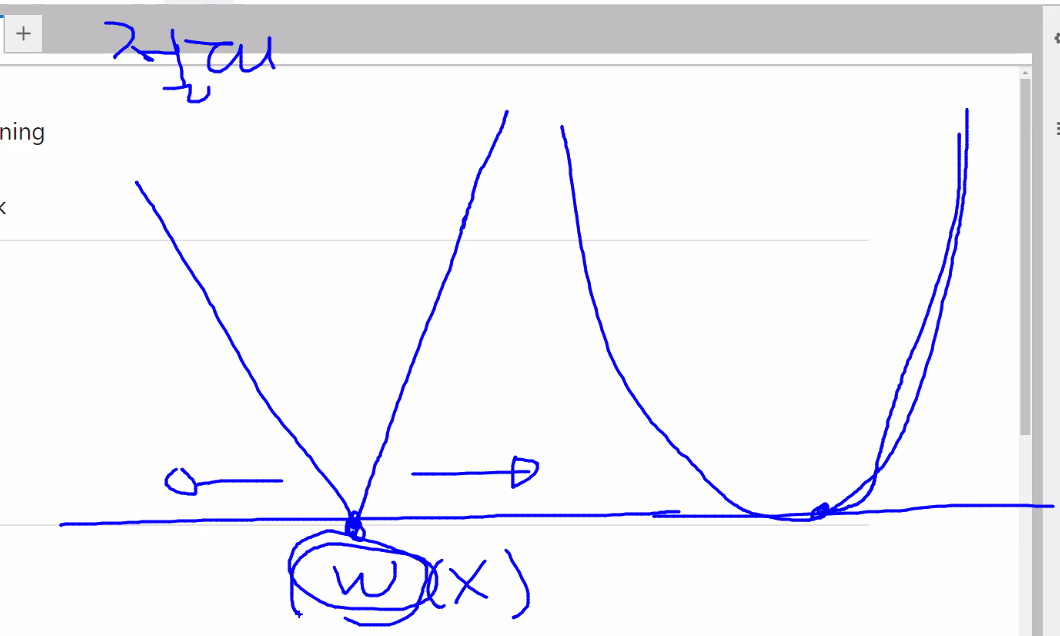
오차함수   

임의로 W값 지정    
학습률을 곱해서 이동할 간격이 나온다.  
W(X)로 가는 것이 목표다.  

선형회귀 모델은 규제 방법에 따라 다시 별도의 유형으로 나눌 수 있다.

회귀 계수에 패널티값을 더한다.

- 일반 선형 회귀
- 릿지 : 선형 회귀에 L1규제를 적용한 방식
- 라쏘 : L1 규제에 적용한 방식, L
- 엘라스틱넷 : L2,L1 규제를 함께 결합한 모델
- 로지스틱 회귀

회귀 계수가 0이 된다면 feature가 탈락한다. 영향력이 없다.

- 교재 312P
- 비용함수
1/N = 평균을 구한다.
Y = 실제값
x,w = 예측값

- 경사하강법
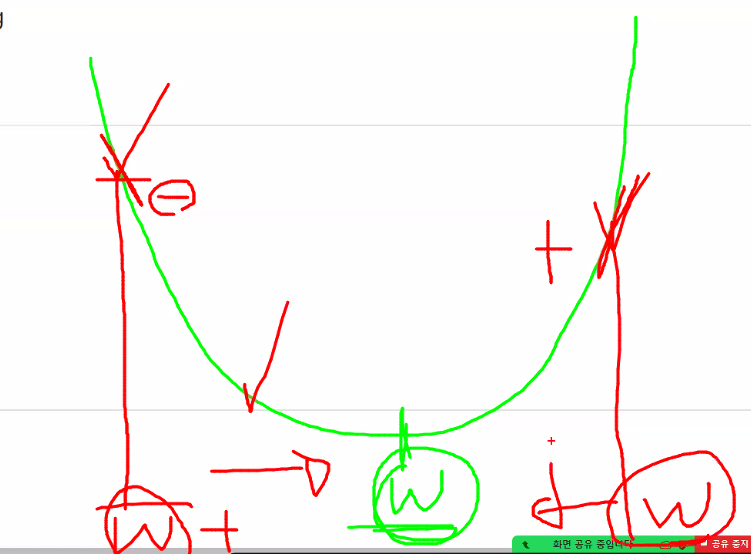




In [1]:
# 교재 315p
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
X = 2 * np.random.rand(100,1) #shape 100 행 1열 총 데이터 갯수 100개
X

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

np.random.randint() : 균일 분포의 정수 난수 1개 생성  
np.random.rand() 0부터 1사이의 균일 분포에서 난수 matrix array생성  
np.random.randn() 가우시안 표준 정규 분포에서 난수 matrix array생성  

- 가우시안 정규분포
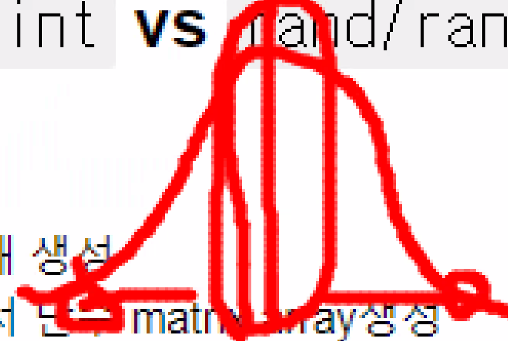
평균근처가 제일 많고 평균에서 멀어질 수록 줄어든다.

In [9]:
 y = 6 + 4 * X  + np.random.randn(100, 1) #np.random.randn(100, 1) = 노이즈

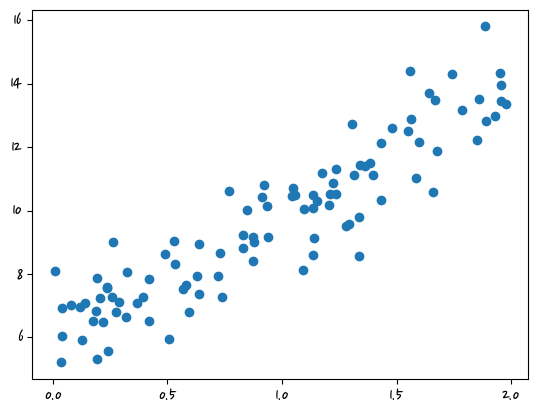

In [10]:
plt.scatter(X,y)

- 교재 316p 오타
N = LEN(y) 들여써야 함  

y = 정답, y.pred = 예측값  

w0 = b  

In [13]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01): #w1 = 가중치, w0 = b
    N = len(y)
    w1_update = np.zeros_like(w1) #파리미터(w1)와 같은 형태 안에 0으로 채워서 만들어라
    w1_update = np.zeros_like(w0)
    y_pred = np.dot(X,w1.T)+w0 #예측, dot=행렬곱, X(뒤의 컬럼수)*w1(앞의 행) 일치해야 계산 가능 , .T = transpose # y = x,w+b와 비슷
    diff = y-y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff)) #w1편미분
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff)) #w0편미분
    return w1_update,w0_update

In [19]:
def gradient_descent_steps(X,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update,w0_update = get_weight_updates(w1,w0,X,y) 
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0

In [20]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [21]:
w1,w0 = gradient_descent_steps(X,y,iters=1000)

In [22]:
print(w1,w0)

[[3.94408465]] [[5.89269511]]


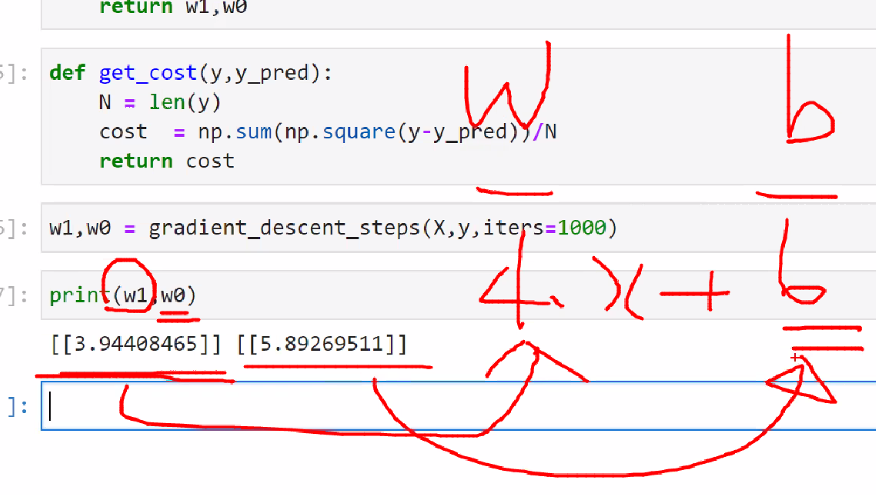
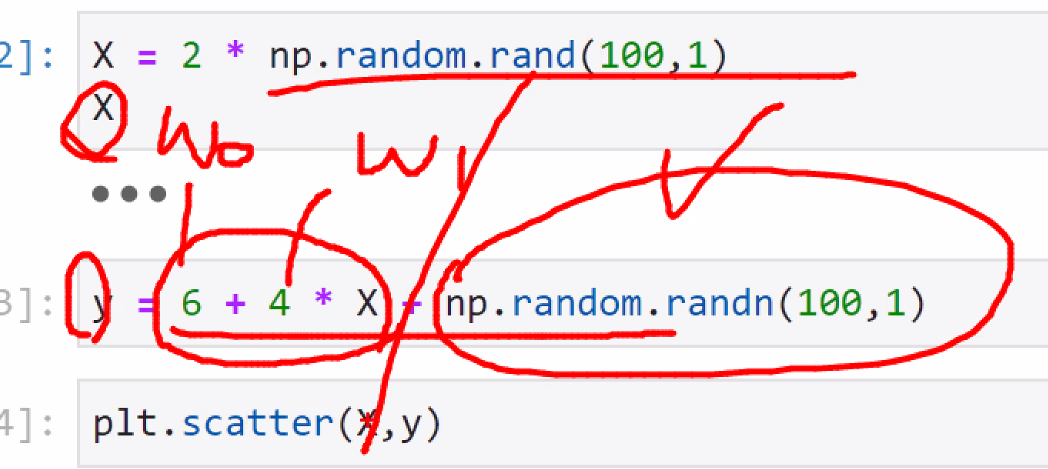

In [23]:
y_pred = w1[0,0]*X+w0 #0행에 0번째 값
get_cost(y,y_pred)

0.959586122614184

- 행렬곱

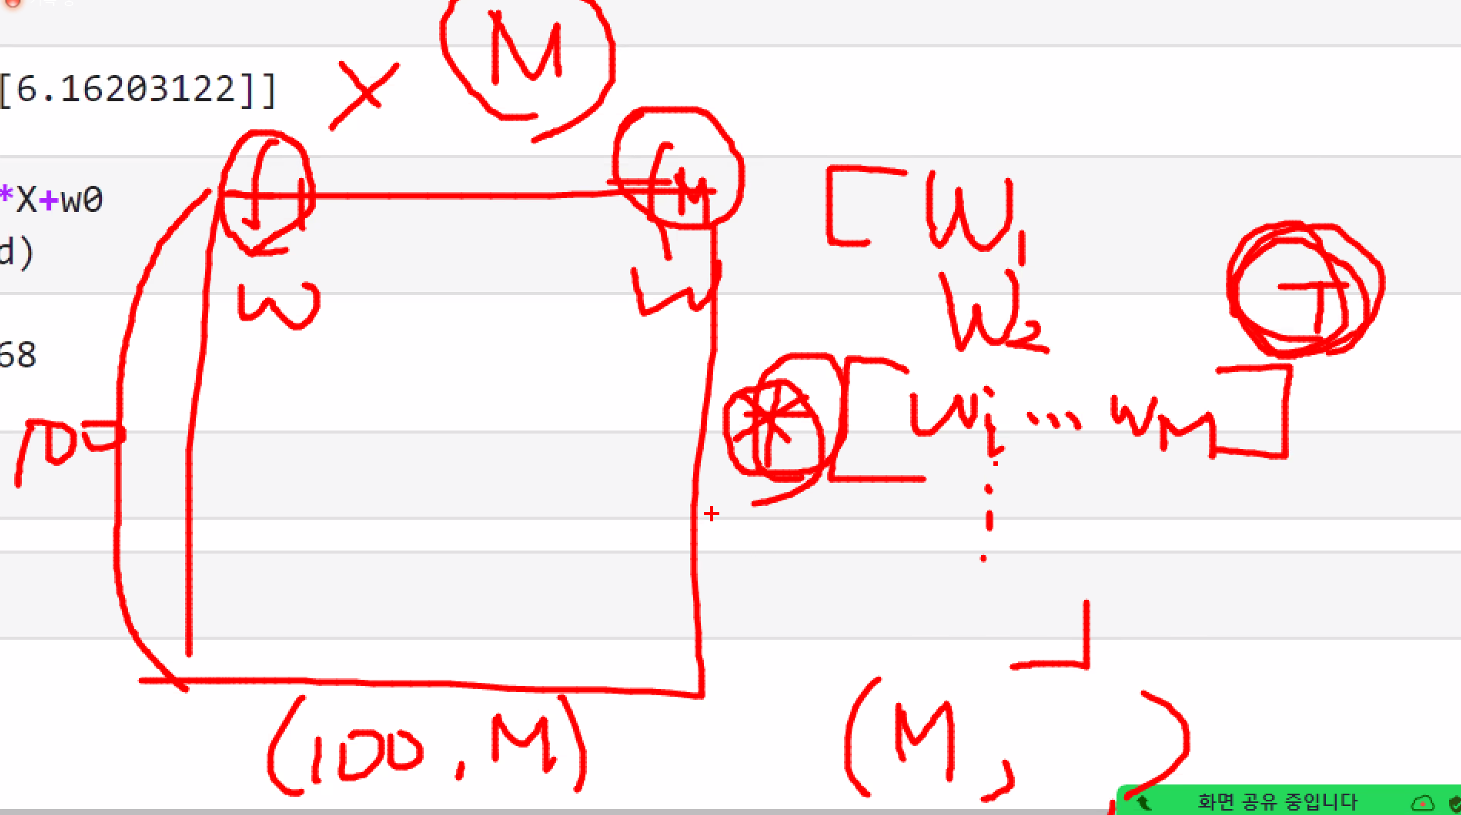

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
- 교재 312p

b는 0으로 두고 계산 안 하기도 한다. 뭐랑 같은지?
LinearRegression 클래스는 fit() 메서드로 X,y배열을 입력받으면 회귀 계수(Coeffi)인 w값을 coef_에 저장한다.

피저간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다.
이러한 현상을 다중공선성문제라고 한다.

매우 많은 경우 pca(신용카드할 때 나옴)를 통해 차원 축소를 수행

### 회귀 평가 지표
회귀는 연속된 데이터라서 연속값은 맞춘다는 개념보다는 오차와 실제값사이가 오차가 얼마나 작게 나는 지
- MAE : 실제값과 예측값의 차이를 절댓값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱으로 변환해 평균한 것
- RMSE : 루트를 씌운것
- R^2 : 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다.

- 사이킷런 평가 지표 API
어제 *-1한 것 = 

분산이 둘 다 같으면 1이 된다. 1이 되면 좋다